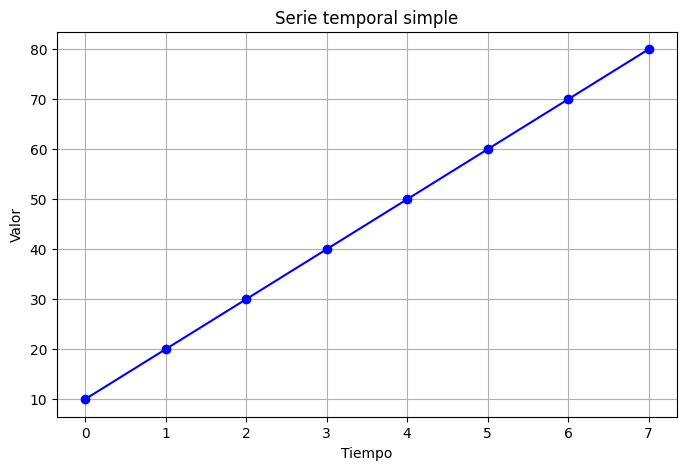

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Serie temporal
data = np.array([10, 20, 30, 40, 50, 60, 70, 80])
tiempo = np.arange(len(data))  # [0, 1, 2, ..., 7]

# Gráfico
plt.figure(figsize=(8, 5))
plt.plot(tiempo, data, marker='o', linestyle='-', color='blue')
plt.title('Serie temporal simple')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.grid(True)
plt.xticks(tiempo)  # Para que los ticks coincidan con los índices
plt.show()


In [2]:
# Función para crear secuencias
def create_sequences(data, seq_length=3):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])  # Secuencia de entrada (X)
        y.append(data[i+seq_length])    # Valor a predecir (y)
    return np.array(X), np.array(y)

In [3]:
# Crear secuencias con longitud 3
seq_length = 3
X, y = create_sequences(data, seq_length)
# Mostrar los resultados
print("X (Secuencias de entrada):")
print(X)
print("\ny (Valores esperados):")
print(y)

X (Secuencias de entrada):
[[10 20 30]
 [20 30 40]
 [30 40 50]
 [40 50 60]
 [50 60 70]]

y (Valores esperados):
[40 50 60 70 80]


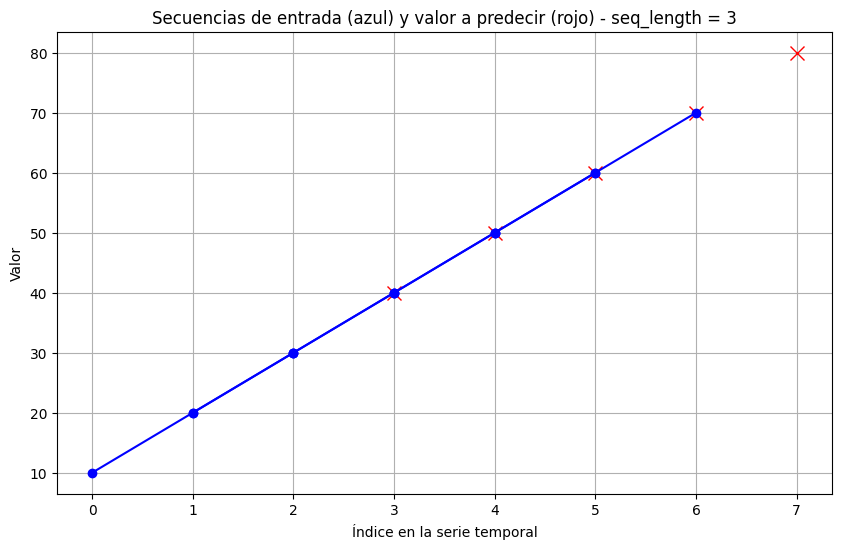

In [4]:
# Graficar cada secuencia y el valor real siguiente
plt.figure(figsize=(10, 6))
for i in range(len(X)):
    # Marcar la secuencia
    plt.plot(range(i, i + seq_length), X[i], marker='o', color='blue')
    # Marcar el valor objetivo (el siguiente después de la secuencia)
    plt.plot(i + seq_length, y[i], marker='x', color='red', markersize=10)

plt.title(f'Secuencias de entrada (azul) y valor a predecir (rojo) - seq_length = {seq_length}')
plt.xlabel('Índice en la serie temporal')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

In [5]:
# Redimensionar X para que tenga la forma adecuada para LSTM: (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Agregar dimensión de características
X

array([[[10],
        [20],
        [30]],

       [[20],
        [30],
        [40]],

       [[30],
        [40],
        [50]],

       [[40],
        [50],
        [60]],

       [[50],
        [60],
        [70]]])

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Crear el modelo LSTM
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),  # Capa LSTM con 50 neuronas
    Dense(1)  # Capa de salida con 1 neurona para predecir el siguiente valor
])
# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

In [34]:
# Entrenar el modelo
model.fit(X, y, epochs=40, verbose=1)

Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 39.4197
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 38.2689
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 37.1116
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 35.9167
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 34.6664
Epoch 6/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 33.3553
Epoch 7/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 31.9879
Epoch 8/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 30.5763
Epoch 9/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 29.1362
Epoch 10/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 27.6821
Epoch 11/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 26.2243
Epoch 12/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 24.7685
Epoch 13/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 23.3201
Epoch 14/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 21.8924
Epoch 15/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 20.5187
Epoch 16/40
1/1 ━━━

In [36]:
# Hacer una predicción
last_sequence = np.array([60, 70, 80]).reshape((1, seq_length, 1))  # Últimos 3 valores como entrada
predicted_value = model.predict(last_sequence)
next_value = predicted_value[0][0]
print(f"\n🔮 Predicción del siguiente valor después de 80: {next_value:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

🔮 Predicción del siguiente valor después de 80: 91.77
